In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
import joblib
import pickle

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data["source"] = "train"
test_data["source"] = "test"

In [4]:
sample = pd.read_csv("gender_submission.csv")
sample.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,train
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,train
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,train
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,train


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [8]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
source           0
dtype: int64

In [9]:
df = pd.concat([train_data,test_data])

In [10]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [11]:
df.shape

(1309, 13)

In [12]:
df.drop(columns = ["Cabin"],inplace=True)

In [13]:
df['Age'].fillna(np.mean(df['Age']),inplace=True)

In [14]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,train


In [15]:
df.index=df['PassengerId']

In [16]:
df["Sex"] = np.where(df["Sex"]=="male",1,0)

In [17]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
df['Embarked'] = df['Embarked'].replace('S',1)
df['Embarked'] = df['Embarked'].replace('C',2)
df['Embarked'] = df['Embarked'].replace('Q',3)


In [19]:
df['Embarked'].fillna(1,inplace=True)

In [20]:
df.select_dtypes(include=np.number)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,1,0.0,3,1,22.000000,1,0,7.2500,1.0
2,2,1.0,1,0,38.000000,1,0,71.2833,2.0
3,3,1.0,3,0,26.000000,0,0,7.9250,1.0
4,4,1.0,1,0,35.000000,1,0,53.1000,1.0
5,5,0.0,3,1,35.000000,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...,...
1305,1305,NaN,3,1,29.881138,0,0,8.0500,1.0
1306,1306,NaN,1,0,39.000000,0,0,108.9000,2.0
1307,1307,NaN,3,1,38.500000,0,0,7.2500,1.0


In [21]:
train = df[df["source"]=="train"]
test  = df[df["source"]=="test"]
del train["source"]
del test["source"]

In [22]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [58]:
train_n = train.select_dtypes(include = np.number)
test_n = test.select_dtypes(include = np.number)
train_X = train_n.drop(columns = ['PassengerId','Survived','Fare','SibSp','Pclass'])
train_y = train_n['Survived']
test_X = test_n.drop(columns = ['PassengerId','Survived','Fare','SibSp','Pclass'])
test_y = test_n['Survived']

In [59]:
test_X.describe()


,Sex,Age,Parch,Embarked
count,418.000000,418.000000,418.000000,418.000000
mean,0.636364,30.192052,0.392344,1.464115
std,0.481622,12.635527,0.981429,0.685516
min,0.000000,0.170000,0.000000,1.000000
25%,0.000000,23.000000,0.000000,1.000000
50%,1.000000,29.881138,0.000000,1.000000
75%,1.000000,35.750000,0.000000,2.000000
max,1.000000,76.000000,9.000000,3.000000


In [63]:
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
   
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred1 = pred_test
    sample["Survived"] = pred_test
    test_y = pred_test
    sample.to_csv(filename, index = False)

In [64]:
model = LogisticRegression()
run_model(model, train_X, train_y, test_X, sample, "test_result_Logist_regression.csv" )

In [65]:
model = LogisticRegression()
model.fit(train_X, train_y)
pred_train = model.predict(train_X)
pred_test = model.predict(test_X)

In [74]:
def KNN_predicts(train_X, train_y, test_X, test_y, scaler, neighbours, metric ='manhattan', weights = 'uniform'):
    train_scaled = scaler.fit_transform(train_X)
    test_scaled = scaler.transform(test_X)
    KNN = KNeighborsClassifier(n_neighbors =neighbours,metric = metric,weights = weights,n_jobs= 4)
    KNN.fit(train_scaled,train_y)
    predictions = KNN.predict(test_scaled)
        
    return predictions

In [80]:
model = LogisticRegression()
pred = KNN_predicts(train_X, train_y, test_X, test_y,StandardScaler(), 5,metric ='chebyshev',weights = 'distance')
sample["Survived"] = pred
sample.to_csv("KNN_Titanic.csv", index = False)

In [78]:
def create_poly(train,test, degree):
    poly = PolynomialFeatures(degree = degree)
    train_poly = poly.fit_transform(train)
    test_poly = poly.fit_transform(test)
    return train_poly, test_poly

In [79]:
train_poly,test_poly = create_poly(train_X,test_X,2)
Knn = KNN_predicts(train_poly,test_poly,train_y,test_y,StandardScaler(),5,metric ='chebyshev',weights = 'distance')

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [52]:
def metric_res(acctual, pred):
    print("confusion_matrix ", confusion_matrix(acctual, pred))
    print("accuracy_score ", accuracy_score(acctual, pred))
    print("recall_score", recall_score(acctual, pred))
    print("precision_score ", precision_score(acctual, pred))
    print("f1_score", f1_score(acctual, pred))
    print("roc_auc_score", roc_auc_score(acctual, pred))
    print("classification report \n", classification_report(acctual, pred))


In [53]:
metric_res(train_y,pred_train)

confusion_matrix  [[459  90]
 [ 97 245]]
accuracy_score  0.7901234567901234
recall_score 0.716374269005848
precision_score  0.7313432835820896
f1_score 0.723781388478582
roc_auc_score 0.7762199213881699
classification report 
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       549
         1.0       0.73      0.72      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



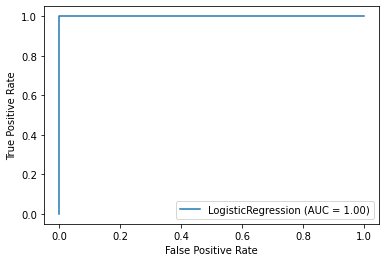

In [54]:
import sklearn
test_y = pred_test
plot_roc_curve(model, test_X, test_y)

In [55]:
joblib.dump(model, 'titanic.pkl')

['titanic.pkl']

In [56]:
lmodel = joblib.load('titanic.pkl')

In [57]:
train_X

,Pclass,Sex,Age,Parch
PassengerId,,,,
1,3,1,22.000000,0
2,1,0,38.000000,0
3,3,0,26.000000,0
4,1,0,35.000000,0
5,3,1,35.000000,0
...,...,...,...,...
887,2,1,27.000000,0
888,1,0,19.000000,0
889,3,0,29.881138,2


In [58]:
list1=[[1,1,23,0]]

In [59]:
df=pd.DataFrame(list1)

In [60]:
lmodel.predict(list1)

array([1.])